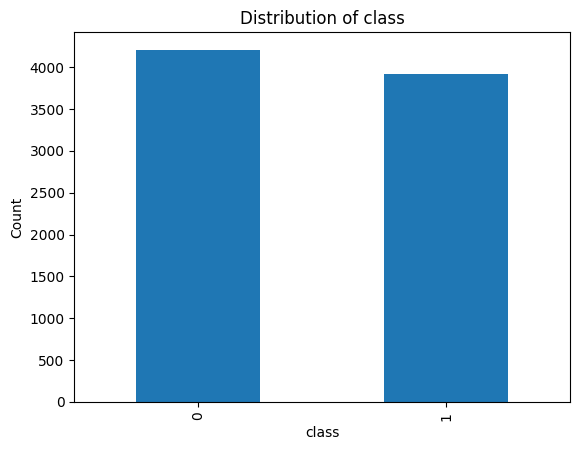

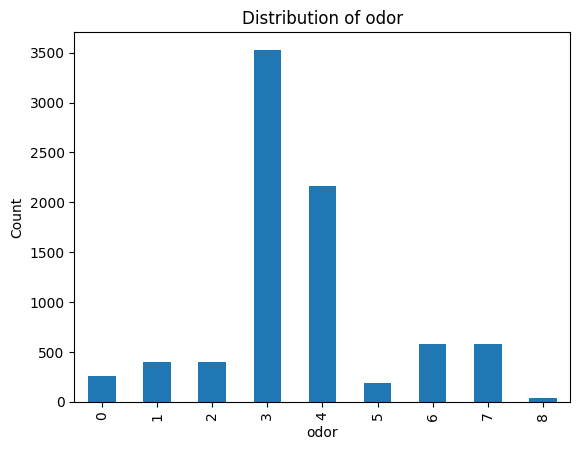

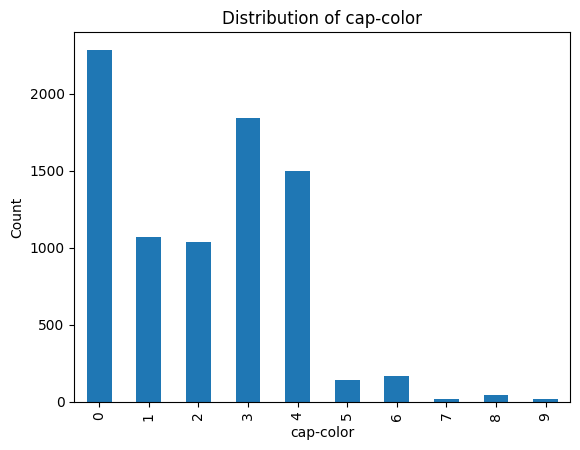

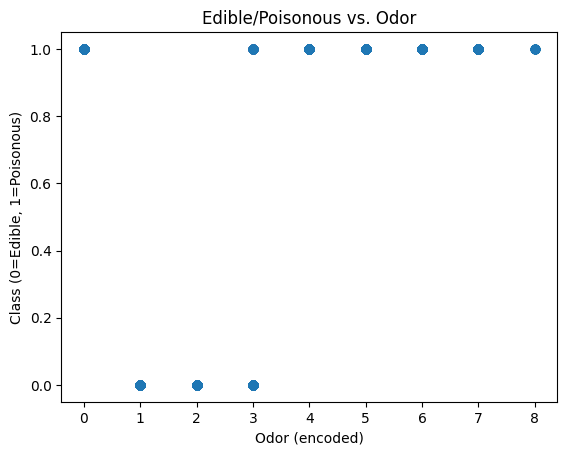

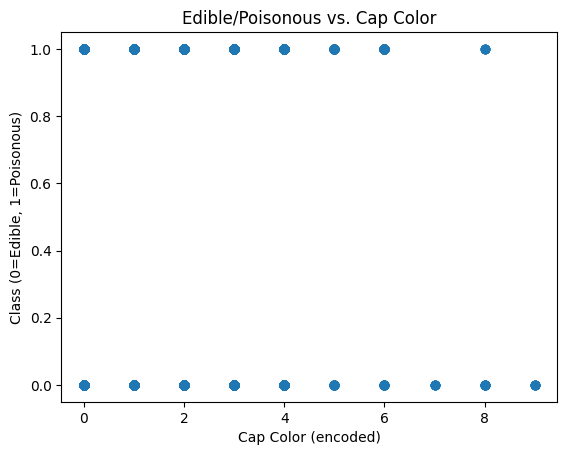

Initial observations suggest that 'odor' shows stronger separation between classes than 'cap-color'.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", 
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", 
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", 
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]
df = pd.read_csv(url, header=None, names=column_names)

# Select relevant columns
df_subset = df[["class", "odor", "cap-color"]].copy()

# Encode categorical values as numeric
label_map = {'e': 0, 'p': 1}
df_subset['class'] = df_subset['class'].map(label_map)

# You can create mappings for other columns similarly
odor_map = {val: idx for idx, val in enumerate(df_subset['odor'].unique())}
cap_color_map = {val: idx for idx, val in enumerate(df_subset['cap-color'].unique())}
df_subset['odor'] = df_subset['odor'].map(odor_map)
df_subset['cap-color'] = df_subset['cap-color'].map(cap_color_map)

# Show distribution of each selected column
for col in df_subset.columns:
    df_subset[col].value_counts().sort_index().plot(kind='bar', title=f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Scatter plots
plt.scatter(df_subset['odor'], df_subset['class'], alpha=0.5)
plt.title("Edible/Poisonous vs. Odor")
plt.xlabel("Odor (encoded)")
plt.ylabel("Class (0=Edible, 1=Poisonous)")
plt.show()

plt.scatter(df_subset['cap-color'], df_subset['class'], alpha=0.5)
plt.title("Edible/Poisonous vs. Cap Color")
plt.xlabel("Cap Color (encoded)")
plt.ylabel("Class (0=Edible, 1=Poisonous)")
plt.show()

# Brief conclusions
print("Initial observations suggest that 'odor' shows stronger separation between classes than 'cap-color'.")
